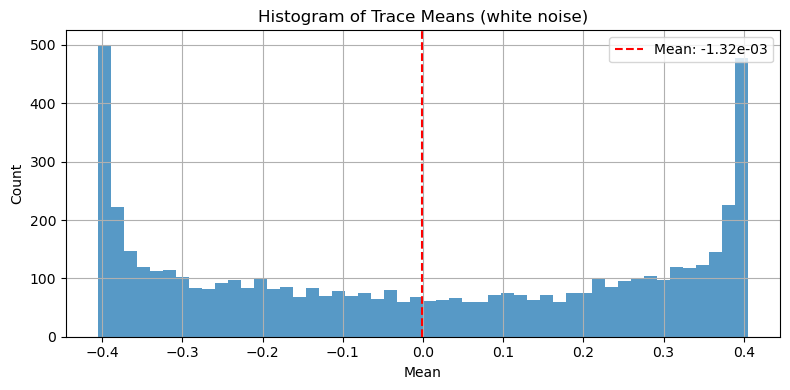

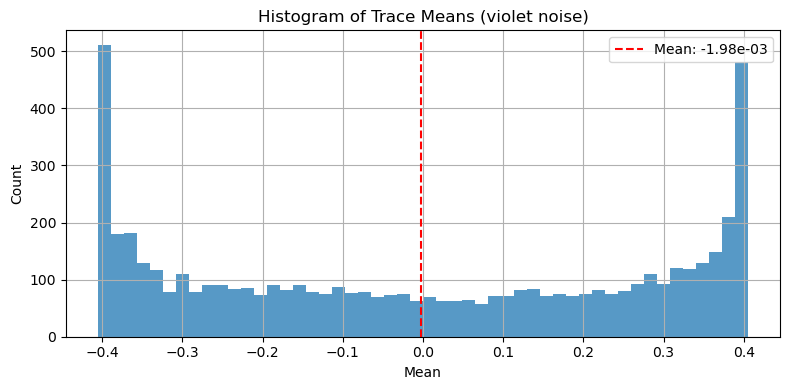

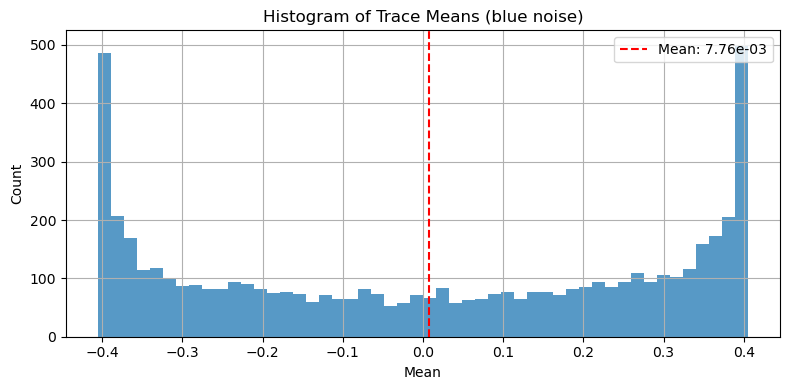

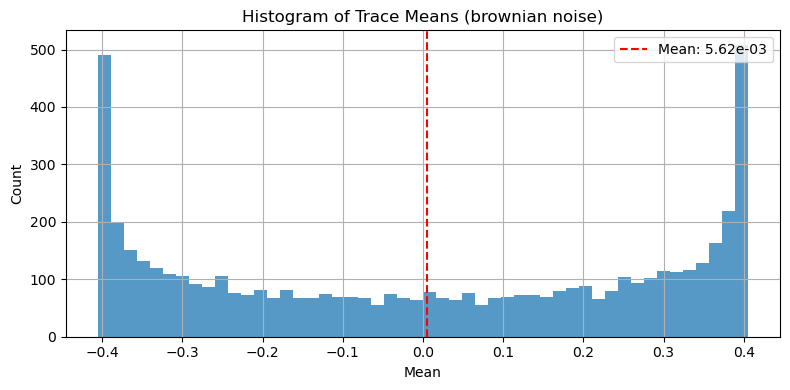

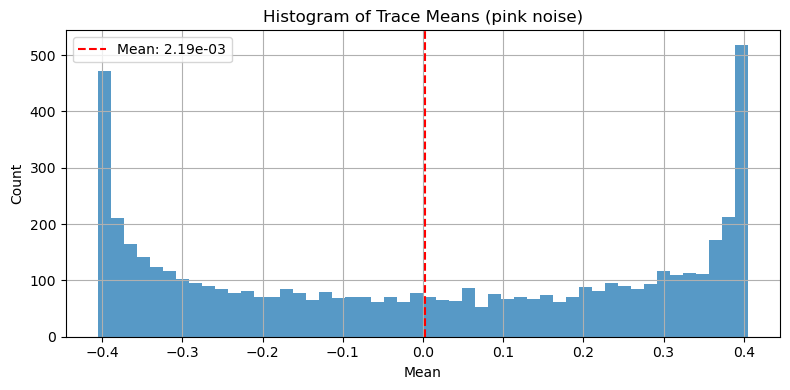

In [18]:
import yaml
import numpy as np
import matplotlib.pyplot as plt
from TraceSimulator import TraceSimulator

def run_noise_analysis(noise_type='white', n_sets=100, position=(-40, 80, -1800)):
    # Define config with dynamic noise type
    yaml_str = f"""
    LCE: '/ceph/bmaier/delight/share/TraceSimulator/optical/optSim_LCE.npz'
    optArrivalTime: '/ceph/bmaier/delight/share/TraceSimulator/optical/optSim_arrivalTime.npz'
    PCE: '/ceph/bmaier/delight/share/TraceSimulator/acoustic/phonSim_PCE.npz'
    phonArrivalTime: '/ceph/bmaier/delight/share/TraceSimulator/acoustic/phonSim_phonTemplate.npz'
    TCE: '/ceph/bmaier/delight/share/TraceSimulator/triplet/trSim_TCE.npz'
    trArrivalTime: '/ceph/bmaier/delight/share/TraceSimulator/triplet/trSim_trTemplate.npz'
    positionMMC: '/ceph/bmaier/delight/share/TraceSimulator/position_MMC.dat'
    sampling_frequency: 3906250
    trace_samples: 32768
    noise_type: '/ceph/dwong/delight/templates/noise_psd_xray.npy'
    noise_power: 33.2
    """

    config = yaml.safe_load(yaml_str)
    ts = TraceSimulator(config)

    means = []
    x, y, z = position

    for _ in range(n_sets):
        batch = ts.generate(E=0, x=x, y=y, z=z, no_noise=False,
                            type_recoil='NR', quantize=False, phonon_only=False)[0]
        means.extend(np.mean(batch, axis=1))

    # Plot histogram
    plt.figure(figsize=(8, 4))
    plt.hist(means, bins=50, alpha=0.75)
    plt.axvline(np.mean(means), color='red', linestyle='--', label=f"Mean: {np.mean(means):.2e}")
    plt.title(f"Histogram of Trace Means ({noise_type} noise)")
    plt.xlabel("Mean")
    plt.ylabel("Count")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
for noise in ['white', 'violet', 'blue', 'brownian', 'pink']:
    run_noise_analysis(noise_type=noise)


In [4]:
import yaml
import numpy as np
import matplotlib.pyplot as plt
from TraceSimulator import TraceSimulator

def run_noise_analysis(noise_type='white', n_sets=100, position=(-40, 80, -1800)):
    # Define config with dynamic noise type
    yaml_str = f"""
    LCE: '/ceph/bmaier/delight/share/TraceSimulator/optical/optSim_LCE.npz'
    optArrivalTime: '/ceph/bmaier/delight/share/TraceSimulator/optical/optSim_arrivalTime.npz'
    PCE: '/ceph/bmaier/delight/share/TraceSimulator/acoustic/phonSim_PCE.npz'
    phonArrivalTime: '/ceph/bmaier/delight/share/TraceSimulator/acoustic/phonSim_phonTemplate.npz'
    TCE: '/ceph/bmaier/delight/share/TraceSimulator/triplet/trSim_TCE.npz'
    trArrivalTime: '/ceph/bmaier/delight/share/TraceSimulator/triplet/trSim_trTemplate.npz'
    positionMMC: '/ceph/bmaier/delight/share/TraceSimulator/position_MMC.dat'
    sampling_frequency: 3906250
    trace_samples: 327
    noise_type: '{noise_type}'
    noise_power: 33200000
    """

    config = yaml.safe_load(yaml_str)
    ts = TraceSimulator(config)

    means = []
    x, y, z = position

    for _ in range(n_sets):
        batch = ts.generate(E=0, x=x, y=y, z=z, no_noise=False,
                            type_recoil='NR', quantize=False, phonon_only=False)[0]
        means.extend(np.mean(batch, axis=1))

    # Plot histogram
    plt.figure(figsize=(8, 4))
    plt.hist(means, bins=50, alpha=0.75)
    plt.axvline(np.mean(means), color='red', linestyle='--', label=f"Mean: {np.mean(means):.2e}")
    plt.title(f"Histogram of Trace Means ({noise_type} noise)")
    plt.xlabel("Mean")
    plt.ylabel("Count")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
for noise in ['white', 'violet', 'blue', 'brownian', 'pink']:
    run_noise_analysis(noise_type=noise)


ValueError: operands could not be broadcast together with shapes (327,) (326,) 

In [2]:
import yaml
import numpy as np
import matplotlib.pyplot as plt
from TraceSimulator import TraceSimulator# Define config with dynamic noise type
yaml_str = f"""
LCE: '/ceph/bmaier/delight/share/TraceSimulator/optical/optSim_LCE.npz'
optArrivalTime: '/ceph/bmaier/delight/share/TraceSimulator/optical/optSim_arrivalTime.npz'
PCE: '/ceph/bmaier/delight/share/TraceSimulator/acoustic/phonSim_PCE.npz'
phonArrivalTime: '/ceph/bmaier/delight/share/TraceSimulator/acoustic/phonSim_phonTemplate.npz'
TCE: '/ceph/bmaier/delight/share/TraceSimulator/triplet/trSim_TCE.npz'
trArrivalTime: '/ceph/bmaier/delight/share/TraceSimulator/triplet/trSim_trTemplate.npz'
positionMMC: '/ceph/bmaier/delight/share/TraceSimulator/position_MMC.dat'
sampling_frequency: 3906250
trace_samples: 32768
noise_type: 'pink'
noise_power: 33.2
"""
position=(-40, 80, -1800)
config = yaml.safe_load(yaml_str)
ts = TraceSimulator(config)

means = []
x, y, z = position

trace = ts.generate(E=0, x=x, y=y, z=z, no_noise=False,
                    type_recoil='NR', quantize=False, phonon_only=False)[0]

In [11]:
ts.config['noise_type'] = 'brownian'
ts._set_noiseGenerator()

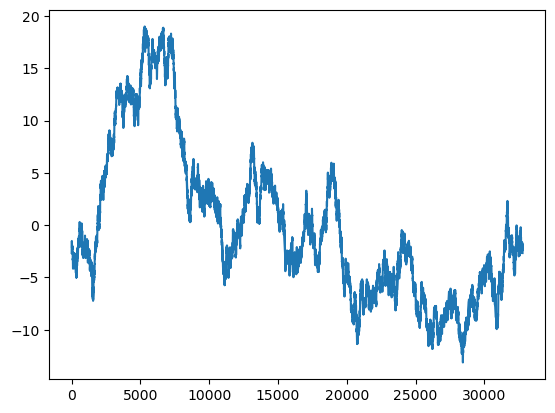

In [13]:
plt.plot(trace[0])

In [12]:
trace = ts.generate(E=0, x=x, y=y, z=z, no_noise=False,
                    type_recoil='NR', quantize=False, phonon_only=False)[0]

In [16]:
np.mean(trace[2])

4.440892098500626e-16

In [3]:
trace.shape

(54, 32768)

In [27]:
means = np.mean(trace, axis=1)

In [ ]:
plt.plot(trace[0])

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fa1d92e8590>>
Traceback (most recent call last):
  File "/home/dwong/anaconda3/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


 ...]

Error in callback <function _draw_all_if_interactive at 0x7fa19e4dfe20> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [28]:
mean=np.mean(means)
print(mean)

-3.469446951953614e-17


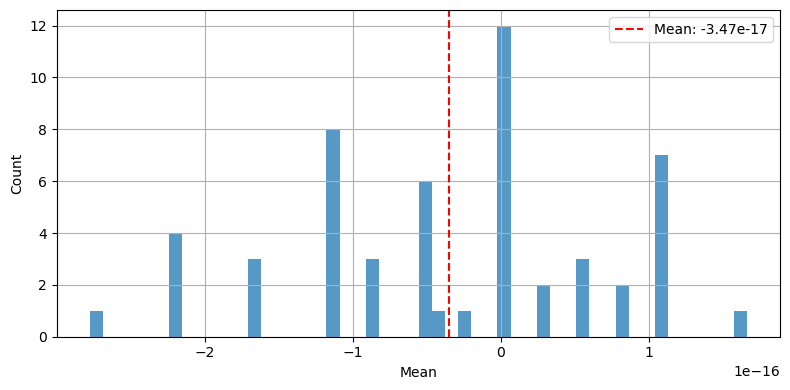

In [29]:
plt.figure(figsize=(8, 4))
plt.hist(means, bins=50, alpha=0.75)
plt.axvline(np.mean(means), color='red', linestyle='--', label=f"Mean: {np.mean(means):.2e}")
plt.xlabel("Mean")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
mean

5.846378524630863

In [13]:
means

array([ 31.74621309,  23.27524603, -31.78963717,  21.67280408,
         0.18484689,  -9.50581146,  24.32198032,   3.2922433 ,
        -5.5614746 ,  29.76242155, -30.90133516, -14.03544378,
         8.05483706,  28.78332154,  29.4174666 , -13.91664383,
        22.15194307, -29.30974666,  21.25342617,  11.40115883,
        31.24229589,  -9.02034258,  31.03727073,  -5.56162304,
         8.40972071,  13.51931412,  20.29247976, -25.31355299,
        24.32142833,  14.35873121,  15.5851682 , -30.45060432,
        23.9064836 , -18.16162609,  30.083695  ,  -7.94668177,
       -28.0067483 ,  29.89991771,  21.81968949,  -8.13454514,
        -3.43741898,  20.17508562, -19.94498897, -17.62226298,
       -30.83214869, -19.71205066,   8.05710087,  30.84430831,
        -8.58760776,   2.44592999,  31.76289316,  24.81367813,
        13.95248065,  31.61115527])